In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import random as rd

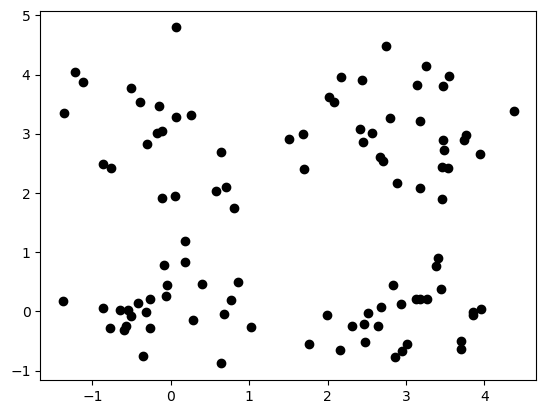

In [2]:
def generate_random_data(N=100) :
    means = [[0,0], [3,3], [0,3], [3,0]]
    covs = [[[0.5, 0], [0, 0.1]], [[0.5, 0], [0, 0.5]],
            [[0.5, 0], [0, 1.0]], [[0.3, 0], [0, 0.3]]]
    
    X = np.zeros((N,2))
    for n in range(N) :
        seed = rd.randint(0,3)
        X[n] = np.random.multivariate_normal(means[seed], covs[seed])

    return X


X = generate_random_data()

plt.scatter(X[:,0], X[:,1], c='k')

In [3]:
def euclidean_distance(a,b) :
    return np.sqrt(np.sum((a-b)**2))


In [27]:
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance) :
    N, d = X.shape
    print(d)
    centroids = np.zeros((K, d))
    sse = np.Inf

    log_sse = []
    log_c = []
    log_centroids = []

    for k in range(K) : 
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]

    for i in range(max_iter) :
        c = []
        for n in range(N) :
            dist_to_centroids = []
            for k in range(K) :
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            c.append(np.argmin(dist_to_centroids))
        
        log_c.append(c)

        prev_centroids = centroids
        centroids = np.zeros((K,d))
        for k in range(K) :
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N) :
                if c[n] == k :
                    tmp_sum += X[n]
                    tmp_count +=1 
            
            centroids[k] = tmp_sum / tmp_count
        
        log_centroids.append(centroids)

        prev_sse = sse
        sse = 0
        for n in range(N) :
            sse += distance_metric(X[n], centroids[c[n]]) **2
        log_sse.append(sse)

        if prev_sse - sse < tol :
            break

    return c, centroids, log_centroids, log_c, log_sse




2


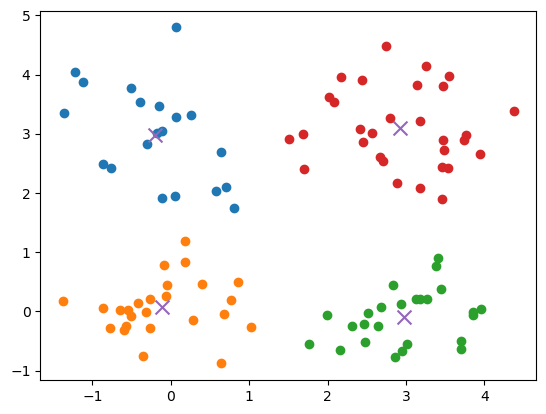

In [29]:
clusters, centroids, _, _, _ = kmeans(X, 4)

for k in range(4) :
    mask = np.equal(clusters, k)
    plt.scatter(X[mask, 0], X[mask, 1])

plt.scatter(centroids[:,0], centroids[:,1], marker='x', s = 100)

